In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("titanic.csv")

In [21]:
df.shape

(342, 15)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     342 non-null    int64  
 1   pclass       342 non-null    int64  
 2   sex          342 non-null    object 
 3   age          290 non-null    float64
 4   sibsp        342 non-null    int64  
 5   parch        342 non-null    int64  
 6   fare         342 non-null    float64
 7   embarked     340 non-null    object 
 8   class        342 non-null    object 
 9   who          342 non-null    object 
 10  adult_male   342 non-null    bool   
 11  deck         136 non-null    object 
 12  embark_town  340 non-null    object 
 13  alive        342 non-null    object 
 14  alone        342 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 35.5+ KB


## Data Description

- Survival : 0 = No, 1 = Yes
- pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex(Gender) : Male, Female
- Age : Age in years
- SibSp : Number of siblings/spouses abroad the titanic
- Parch : Number of parents/children abrod the titanic
- Ticket : Ticket Number
- Fare : Passenger fare
- Cabin : Cabin Number
- Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# Q1: Print first and last rows from the dataset

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
2,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
4,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [24]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
337,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
338,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
339,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
340,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
341,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q2: Select only survived people

In [25]:
df[df['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
2,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
4,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
338,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
339,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
340,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Q3: Select sex, fare, survived columns

In [26]:
specific_columns=df[["sex","fare","survived"]]
specific_columns

,sex,fare,survived
0,female,71.2833,1
1,female,7.9250,1
2,female,53.1000,1
3,female,11.1333,1
4,female,30.0708,1
...,...,...,...
337,female,7.2250,1
338,female,83.1583,1
339,female,26.0000,1
340,female,30.0000,1


# Q4: Add a new_column to a DataFrame that combines class and embark_town

In [27]:
df["new_column"]=df['class']+df['embark_town']
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_column
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,FirstCherbourg
1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,ThirdSouthampton
2,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,FirstSouthampton
3,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,ThirdSouthampton
4,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,SecondCherbourg


# Q5: Remove new_column from the DataFrame

In [28]:
df = df.drop("new_column",axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
2,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
3,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
4,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


# Q6: Filter DataFrame for rows of survived Males only 

In [29]:
df[df['sex']=='male']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
8,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
10,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
12,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
17,1,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,yes,True
24,1,1,male,NaN,0,0,35.5000,S,First,man,True,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
323,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
329,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
334,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


# Q7: The total number of males who survived 

In [30]:
df2 = len(df[(df['sex']=='male')&(df['survived']==1)])
df2

109

# Q8: How many values in each class?

In [31]:
df1 = df['class'].value_counts()
df1

First     136
Third     119
Second     87
Name: class, dtype: int64

# Import Seaborn

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
sns.set()

# Q9: Draw barplot represents survived people based on sex

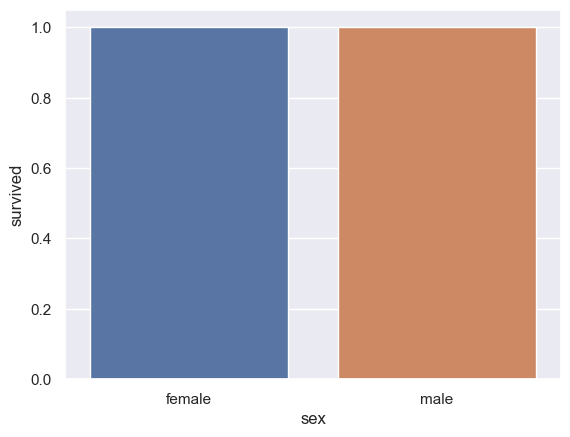

In [33]:
sns.barplot(x='sex', y='survived',data=df);

# Q10: Draw catplot represents survived people based on embarked

In [47]:
df1 = pd.read_csv('C:/Users/luka3/Downloads/titanic.csv')
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


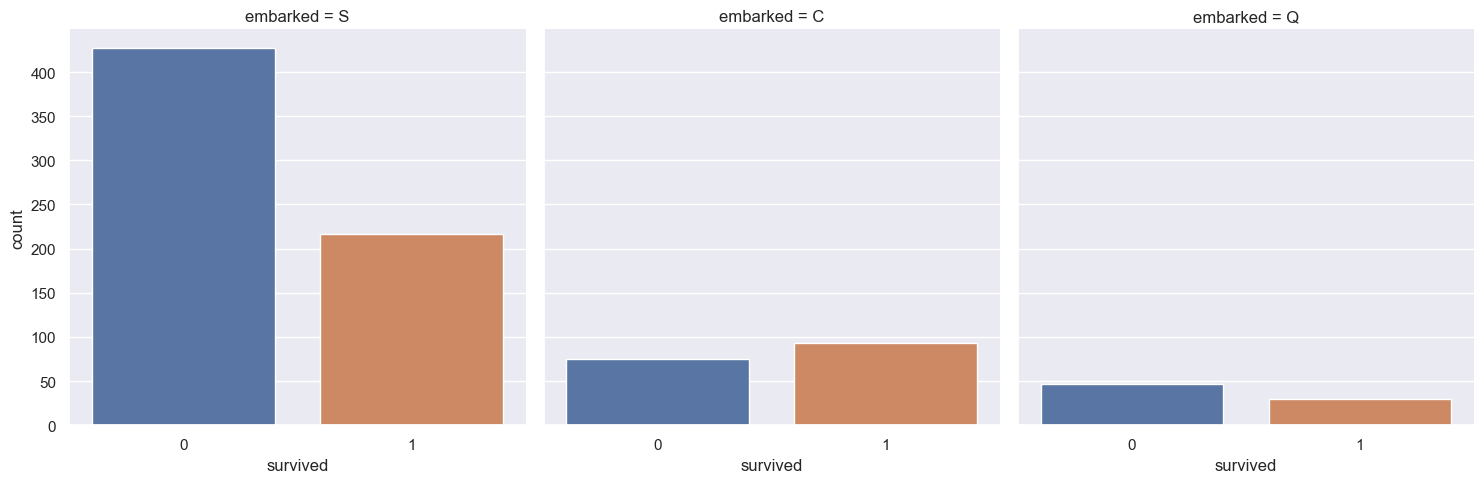

In [48]:
sns.catplot(x ='survived',
kind ='count', col ='embarked', data =df1)


# Q11: Draw boxplot represents distribution of male and female based on age and pclass

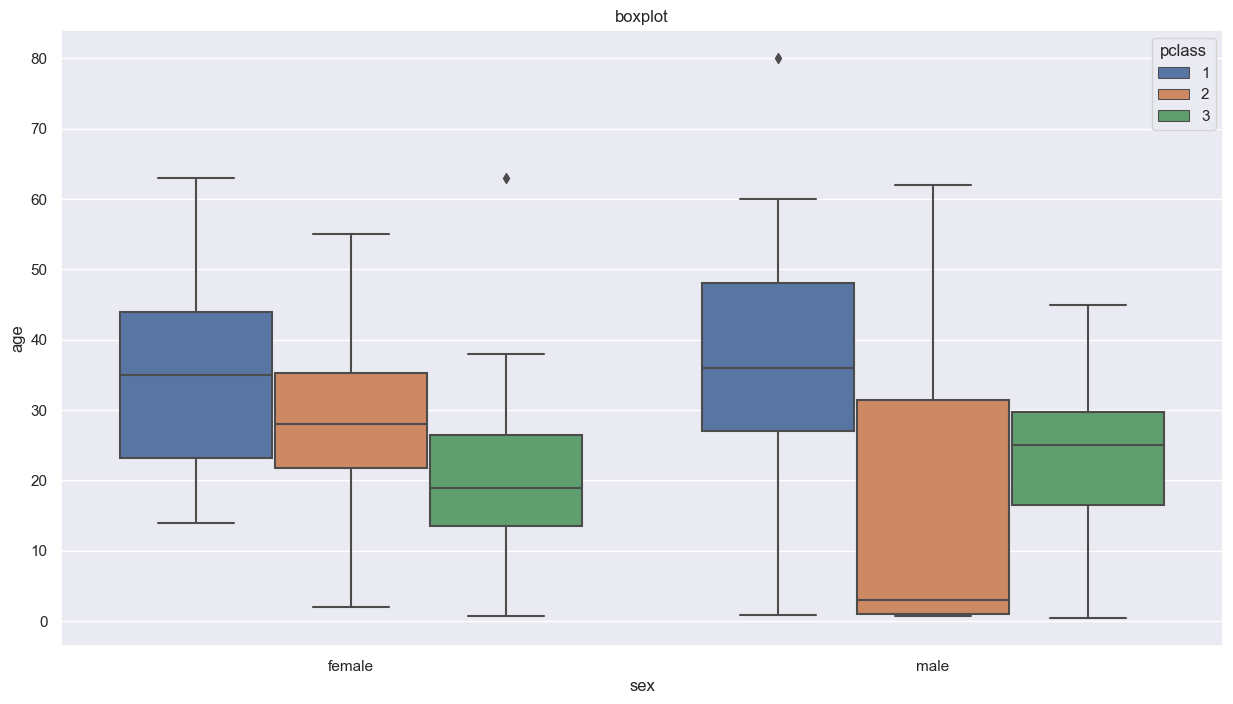

In [35]:
plt.figure(figsize=(15,8))

sns.boxplot(
    x="sex", 
    y="age",
    hue="pclass",
    data=df)

plt.title("boxplot");

# Q12: Draw heatmap represents correlations between sibsp, parch, age, fare, and survived columns

<AxesSubplot:>

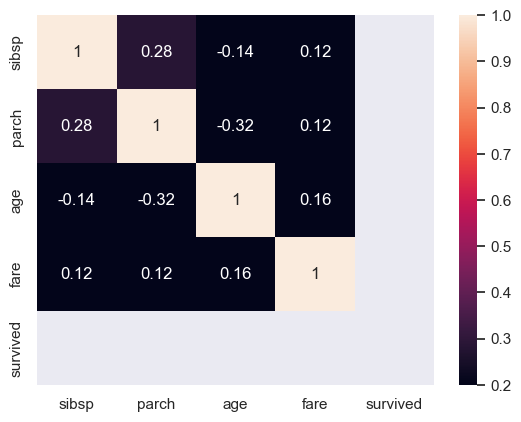

In [38]:
sns.heatmap(df[['sibsp', 'parch', 'age', 'fare','survived']].co(), vmin=0.2, vmax=1,annot=True)


# Q13: Draw factorplot represents the relation between sibsp and survived columns

C:\Users\luka3\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


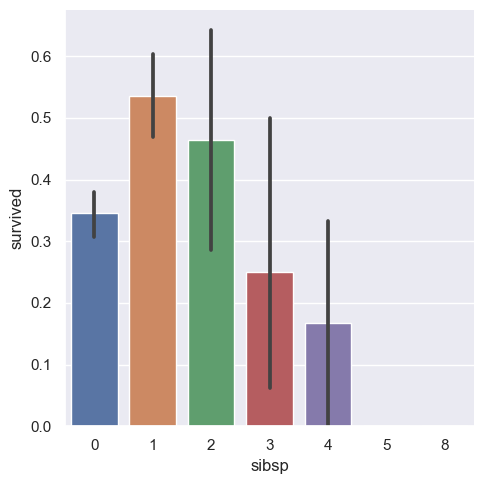

In [49]:
sns.factorplot(x='sibsp',y='survived',data = df1, kind ="bar")
plt.show();

# Q14: Draw extra insights [Optional]